In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/usa_real_estate.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 63.4+ MB


In [6]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


### Data Analysis 

In [7]:
# counting the number of classes in status column
df.status.value_counts()

for_sale          921528
ready_to_build      1631
Name: status, dtype: int64

In [10]:
# removing "ready_to_build" class and dropping status column
df = df[df.status != 'ready_to_build']
df.drop('status', axis=1, inplace=True)

In [12]:
# dropping the street and full_address columns
df.drop(['street', 'full_address'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921528 entries, 0 to 923158
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       921528 non-null  float64
 1   bed         789825 non-null  float64
 2   bath        807967 non-null  float64
 3   acre_lot    649536 non-null  float64
 4   city        921454 non-null  object 
 5   state       921528 non-null  object 
 6   zip_code    921323 non-null  float64
 7   house_size  623685 non-null  float64
 8   sold_date   456396 non-null  object 
dtypes: float64(6), object(3)
memory usage: 59.8+ MB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,921528.0,884122.739865,2.625916e+06,0.0,269000.00,475000.00,839000.00,875000000.0
bed,789825.0,3.331138,2.072119e+00,1.0,2.00,3.00,4.00,123.0
bath,807967.0,2.488164,1.940057e+00,1.0,1.00,2.00,3.00,198.0
acre_lot,649536.0,17.075888,9.623229e+02,0.0,0.11,0.29,1.15,100000.0
zip_code,921323.0,6591.003136,3.816047e+03,601.0,2920.00,7004.00,10001.00,99999.0
house_size,623685.0,2140.472307,3.038969e+03,100.0,1128.00,1650.00,2496.00,1450112.0


Text(0.5, 1.0, 'Price')

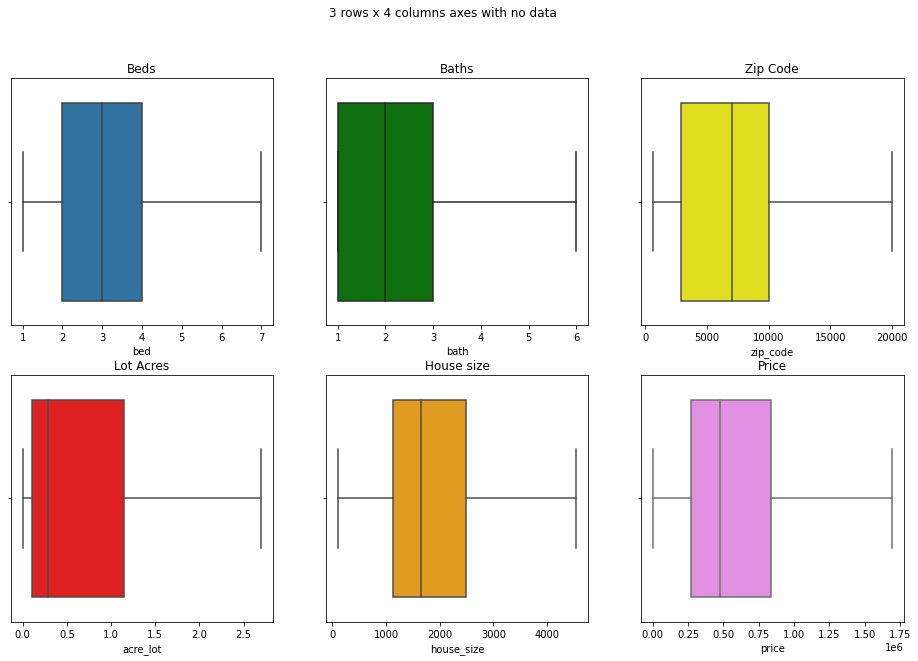

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Collumns Box Plots')

# Beds
sns.boxplot(ax=axes[0,0], x=df.bed, showfliers = False)
axes[0,0].set_title('Beds')

# Baths
sns.boxplot(ax=axes[0,1], x=df.bath, showfliers = False, color='green')
axes[0,1].set_title('Baths')

# Zip Code
sns.boxplot(ax=axes[0,2], x=df.zip_code, showfliers = False, color='yellow')
axes[0,2].set_title('Zip Code')

# Acres
sns.boxplot(ax=axes[1,0], x=df.acre_lot, showfliers = False, color='red')
axes[1,0].set_title('Lot Acres')

# House size
sns.boxplot(ax=axes[1,1], x=df.house_size, showfliers = False, color='orange')
axes[1,1].set_title('House size')

# Price
sns.boxplot(ax=axes[1,2], x=df.price, showfliers = False, color='violet')
axes[1,2].set_title('Price')

